## Introduction:
Clustering of document vectors and finding centroids

In [13]:
import os
import sys
import pandas as pd
import utils
import sklearn
import numpy as np
links_paths_path = 'wikispeedia_paths-and-graph/'

In [217]:
data = np.load('./Doc2VecArray.npy')

In [238]:
# K-means
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = np.array(data)
# k-means in scikit-learn only supports Euclidean distances, 
# normalize the text vectors so Euclidean distances are equivalent to cosine distances
X  =  preprocessing.normalize(X, norm = 'l2' )

kmeans = KMeans(n_clusters=16, random_state=1, n_init=1, algorithm="elkan", init='k-means++').fit(X)
X_new = kmeans.transform(X)
label_list = kmeans.labels_.tolist()

In [239]:
cluster_df = pd.DataFrame(label_list,columns=['cluster'])
cluster_df

,cluster
0,3
1,8
2,14
3,12
4,3
...,...
4599,15
4600,1
4601,3
4602,4


In [240]:
articles_df = pd.read_csv(links_paths_path + 'articles.tsv', sep='\t',\
                                  names = ['article'],  skiprows=12)
articles_df = articles_df.join(cluster_df)
articles_df.to_csv("cluster.csv", index = False)

In [241]:
TOP2011 = pd.read_csv('2011TOP100.csv')

TOP2012 = pd.read_csv('2012TOP100.csv')

TOP2013 = pd.read_csv('2013TOP100.csv')

TOPs = pd.concat([TOP2011,TOP2012,TOP2013],axis = 0)

TOPs = TOPs.drop_duplicates('article', keep = 'first').reset_index(drop=True)

In [242]:
articles_df['idx'] = articles_df.index

In [243]:
cluster_match = dict(zip(articles_df['idx'],articles_df['cluster']))
Cos_dist = []
for key, value in cluster_match.items():
    Cos_dist.append(X_new[key][value])

In [244]:
cos_df = pd.DataFrame(Cos_dist,columns=['cos_distance'])
articles_df = articles_df.join(cos_df)

In [245]:
articles_df

,article,cluster,idx,cos_distance
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,3,0,0.852966
1,%C3%85land,8,1,0.903834
2,%C3%89douard_Manet,14,2,0.855027
3,%C3%89ire,12,3,0.938648
4,%C3%93engus_I_of_the_Picts,3,4,0.840498
...,...,...,...,...
4599,Zionism,15,4599,0.937848
4600,Zirconium,1,4600,0.682443
4601,Zoroaster,3,4601,0.878350
4602,Zuid-Gelders,4,4602,0.867821


In [246]:
TOPs = TOPs.merge(articles_df,on = 'article')
TOPs['cos_distance'].mean()

0.8658129943315674

In [247]:
articles_df['cos_distance'].mean()

0.8658748758776884

In [108]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X)
top_vec = np.zeros((len(TOPs),2))
for idx,item in enumerate(TOPs['idx'].tolist()):
    top_vec[idx,:] = reduced_data[int(item),:]

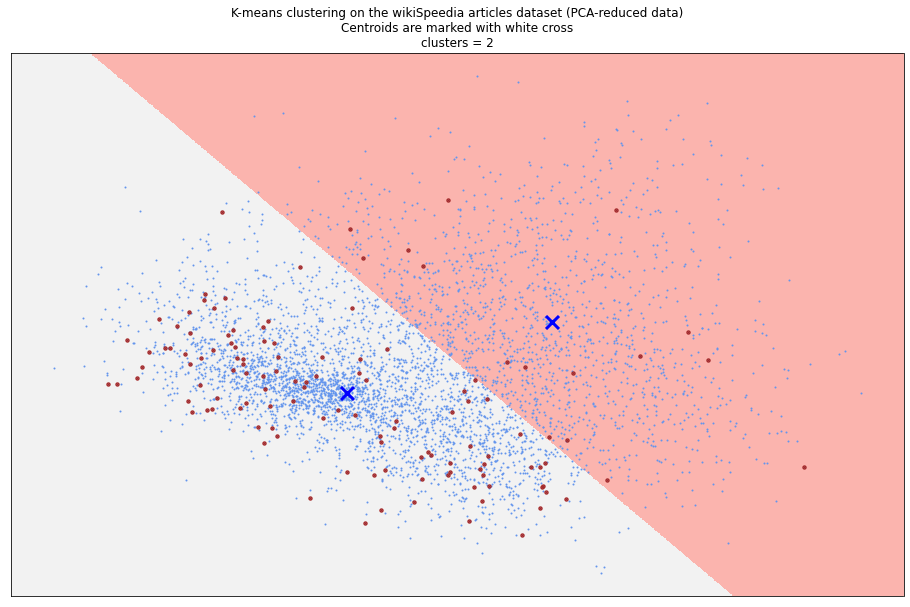

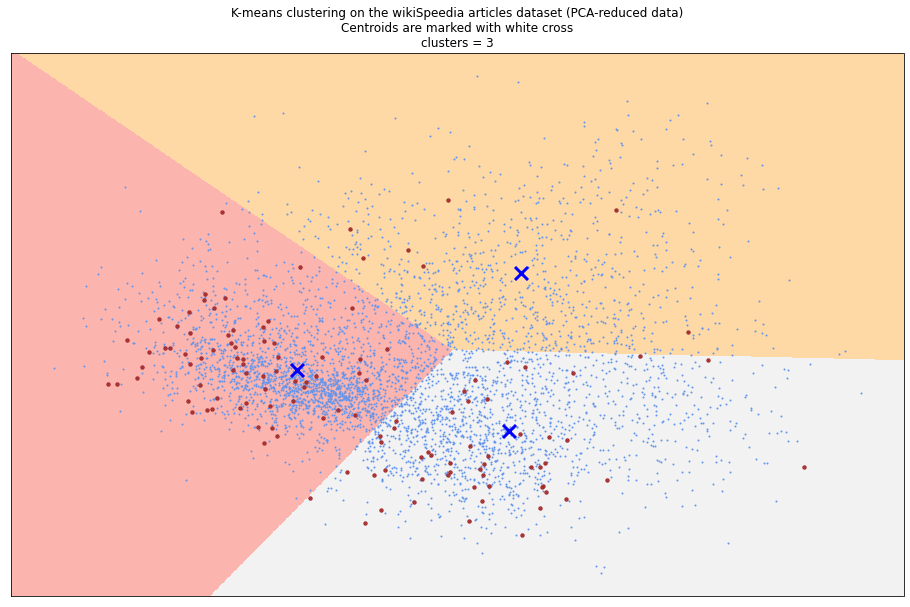

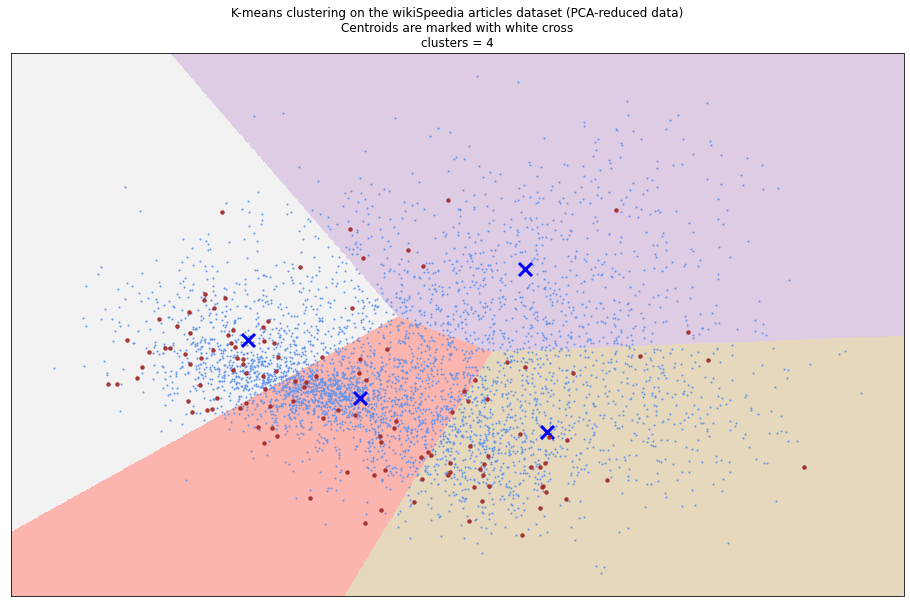

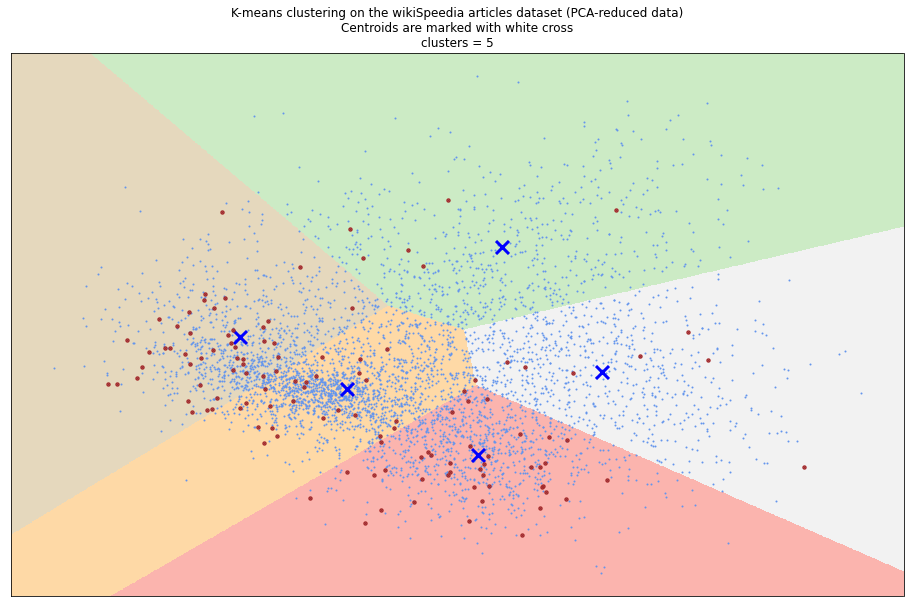

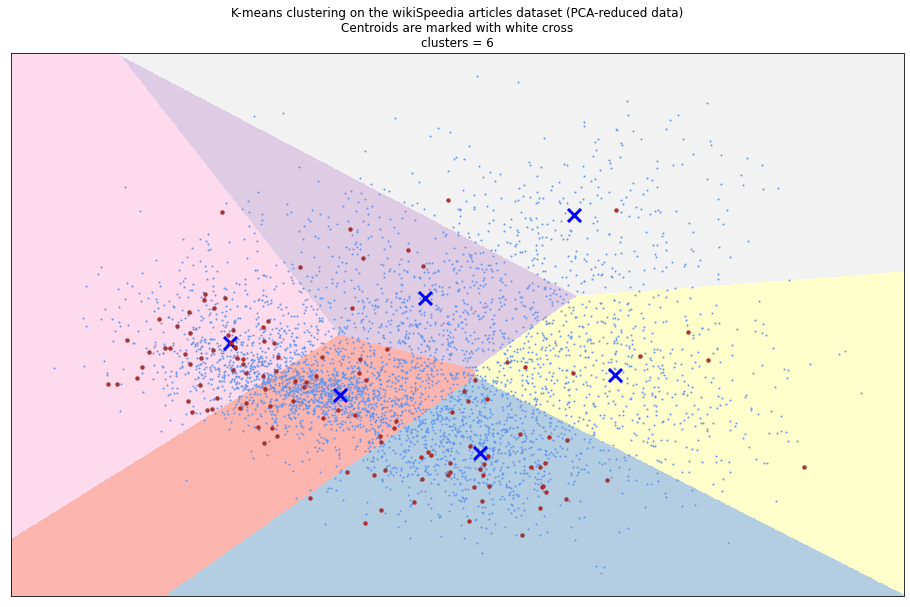

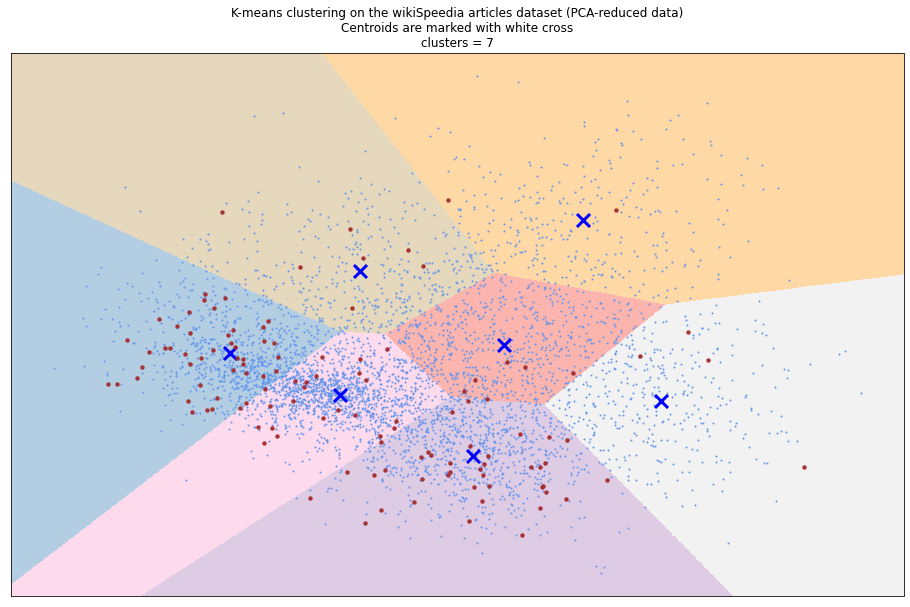

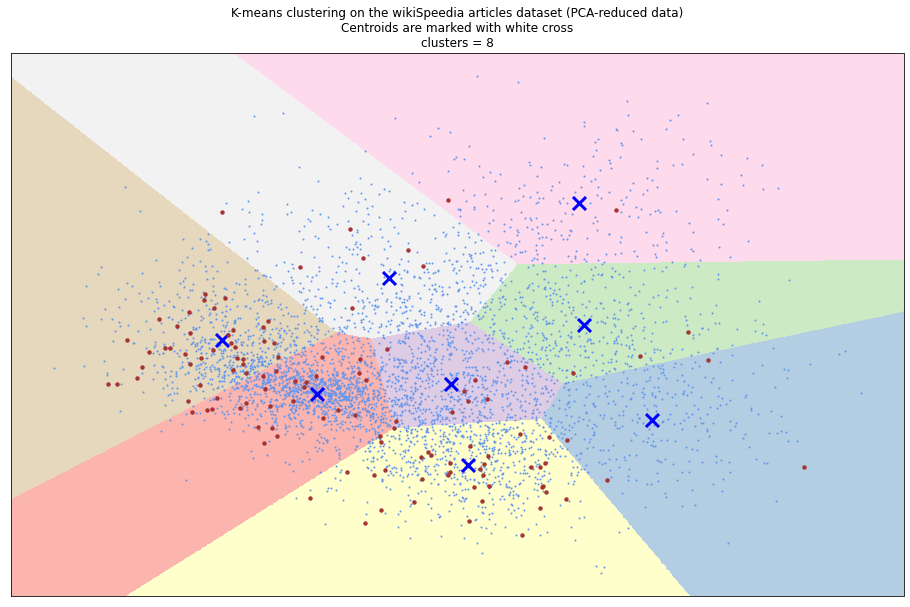

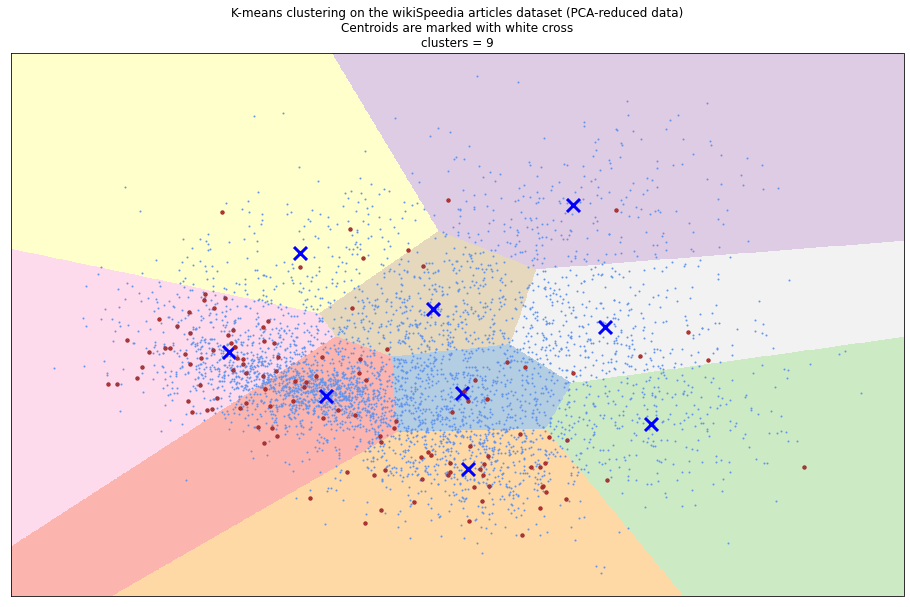

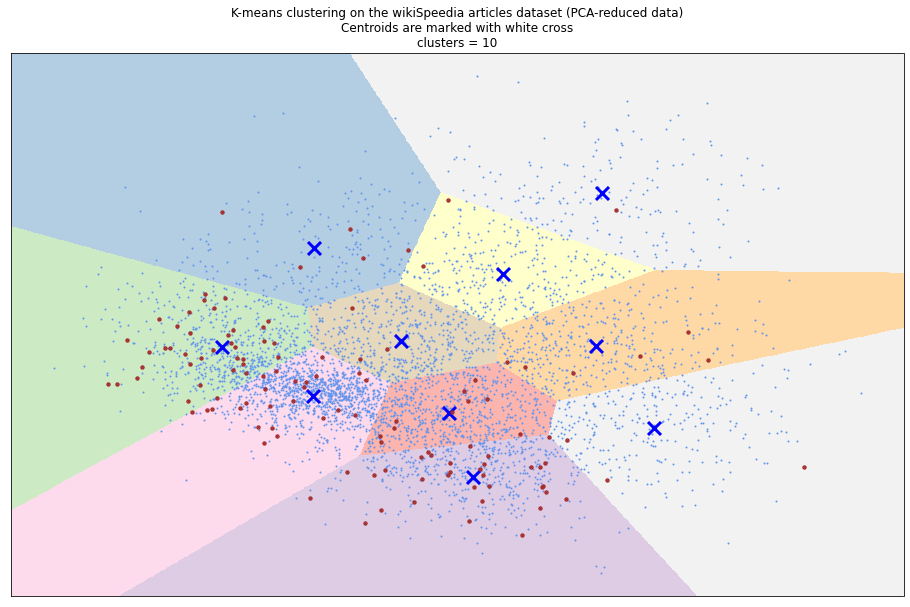

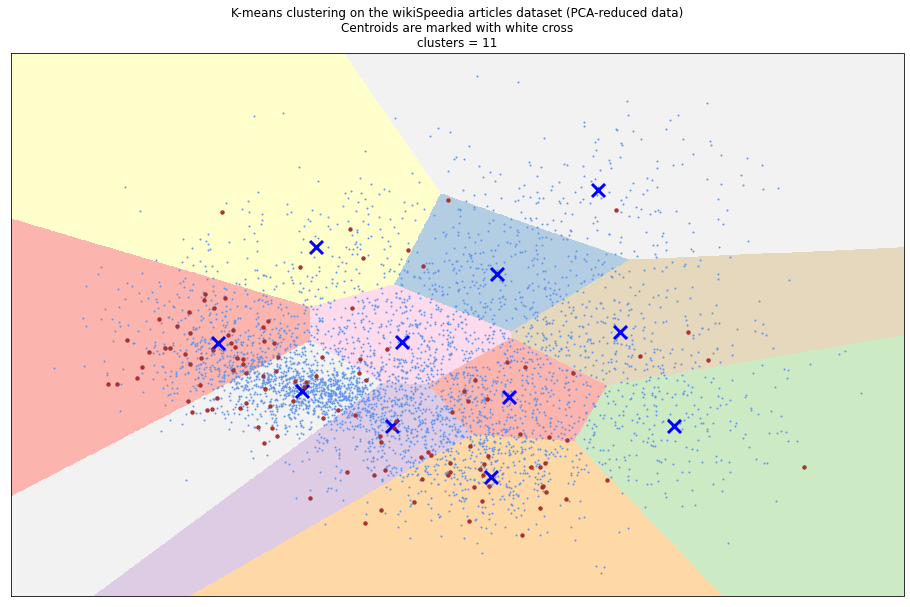

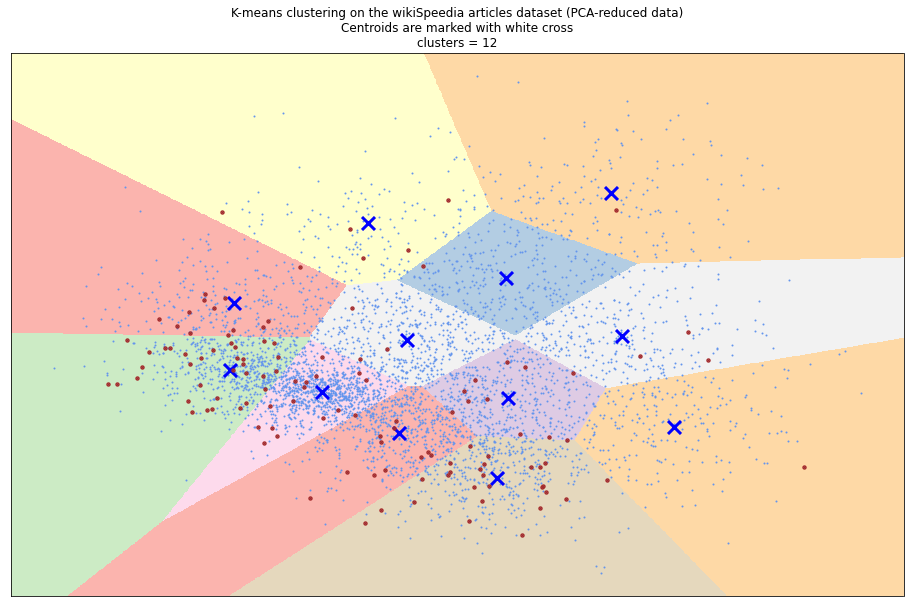

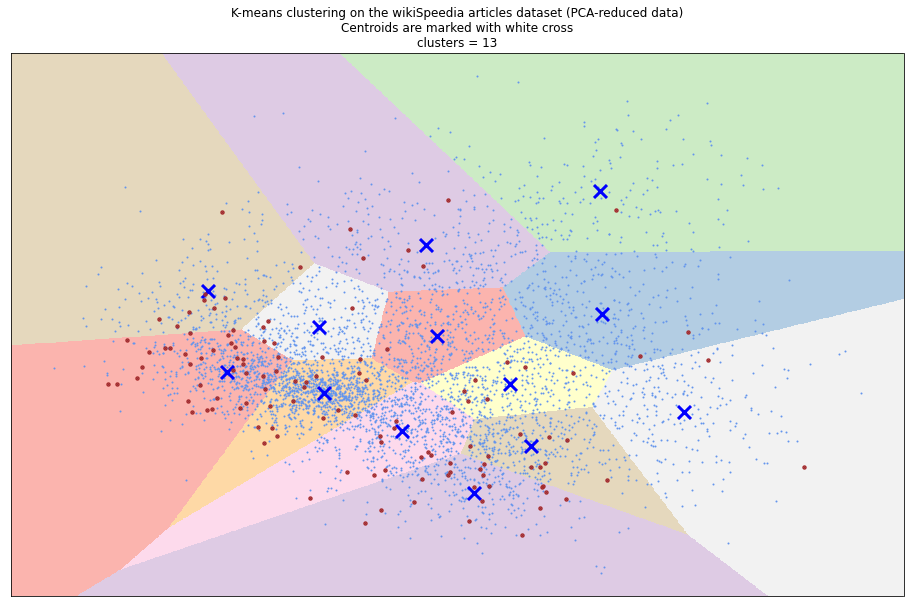

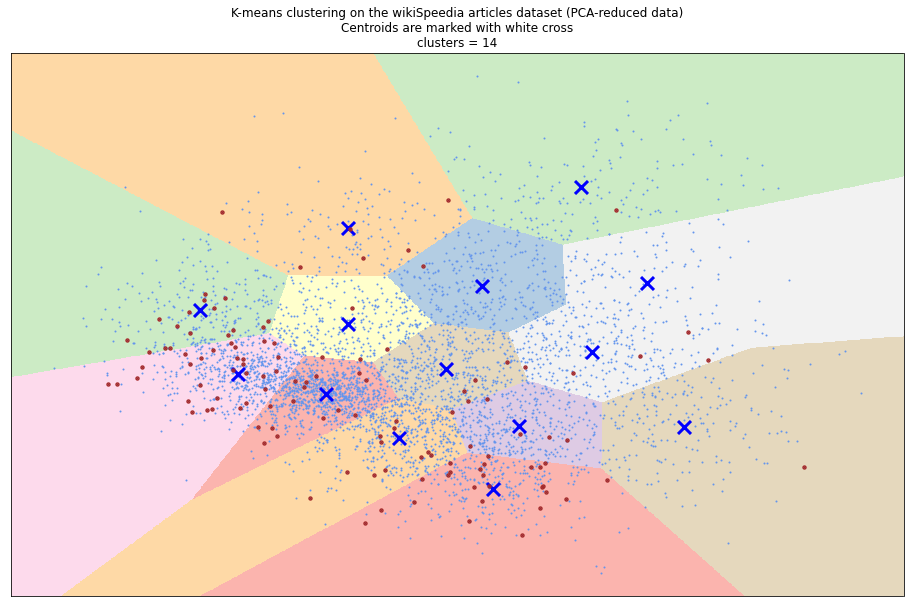

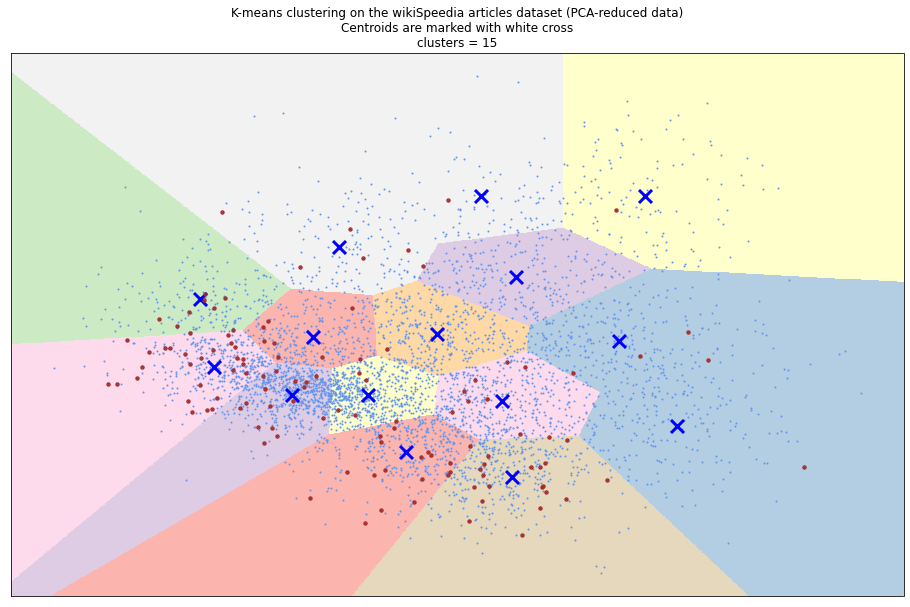

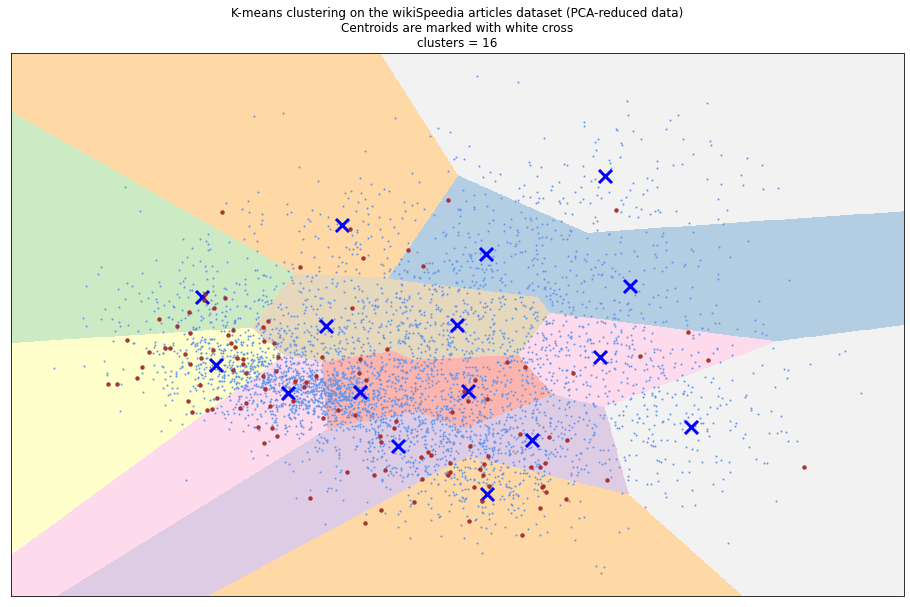

In [183]:
# PCA K-means

for n in range(2,17):
    kmeans_PCA = KMeans(init="k-means++", n_clusters=n, n_init=1)
    kmeans_PCA.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans_PCA.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1,figsize = (16,10))
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Pastel1,
        aspect="auto",
        origin="lower"
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], color = 'cornflowerblue', marker = '.', markersize=2,linestyle='')
    # Plot the centroids as a white X
    centroids = kmeans_PCA.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color = "blue",
        zorder=10,
    )
    plt.scatter(
        top_vec[:, 0],
        top_vec[:, 1],
        marker="o",
        s=2,
        linewidths=3,
        color = "brown",
        zorder=10,
    )
    plt.title(
        "K-means clustering on the wikiSpeedia articles dataset (PCA-reduced data)\n"
        "Centroids are marked with white cross\n"
        "clusters = "+str(n)
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()